# 1D Zero-padding

## 미리 구현

In [12]:
import random

data = [random.randint(0,10) for _ in range(10)]
data_len = len(data)

print("Input data: ", data)
print("Length of data: ", len(data))

pad = 2

for _ in range(pad):
    data.insert(0,0)
    data.insert(len(data),0)

data

Input data:  [6, 6, 6, 3, 10, 4, 6, 7, 2, 0]
Length of data:  10


[0, 0, 6, 6, 6, 3, 10, 4, 6, 7, 2, 0, 0, 0]

## 복습 구현

In [17]:
import random

data = [random.randint(0,10) for _ in range(10)]
data_len = len(data)

print(f"Input data: {data}")
print(f"Length of data: {len(data)}")

pad = 2

# method.1
padded_data = list()
for _ in range(pad):
    padded_data.append(0)

padded_data= padded_data + data

for _ in range(pad):
    padded_data.append(0)
print(f"Input data: {padded_data}")
print(f"Length of data: {len(padded_data)}")

# mehthod.2
padded_data2 = [0]*pad + data + [0]*pad  

print(f"Input data: {padded_data2}")
print(f"Length of data: {len(padded_data2)}")

Input data: [3, 5, 8, 6, 1, 10, 10, 0, 2, 0]
Length of data: 10
Input data: [0, 0, 3, 5, 8, 6, 1, 10, 10, 0, 2, 0, 0, 0]
Length of data: 14
Input data: [0, 0, 3, 5, 8, 6, 1, 10, 10, 0, 2, 0, 0, 0]
Length of data: 14


# 1D Average Pooling with Zero-padding


<br>
<font size="5">
    $$ p[i] = \frac{1}{2s+1}\sum_{\alpha=i-s}^{i+s} w[\alpha] $$
</font>

<br>
<font size="5">
    $$ L_{o} = L_{i} + 2p - L_{f} + 1 $$
</font>

<br>

In [36]:
import random

# parameter setting
pool_size = 3
pad = int((pool_size - 1) / 2)


data = [random.randint(0,10) for _ in range(10)]
data_len = len(data)

print(f"Input data: {data}")
print(f"Length of data: {len(data)}\n")

# Zero-padding
data = [0]*pad + data + [0]*pad
print(f"Input data: {data}")
print(f"Length of data: {len(data)}\n")

# Average pooling
valid_len = len(data) - pool_size + 1 # 만약 제로패딩을 하지 않은 원본데이터의 길이를 사용할 경우, +2*pad 가 필요
pooled = list()

for pool_loc in range(valid_len):
    window = data[pool_loc : pool_loc+pool_size]
    
    window_sum = 0
    for window_val in window:
        window_sum += window_val
    pooled.append(window_sum / pool_size)

print(f"Input pooled data: {pooled}")
print(f"Length of pooled data: {len(pooled)}")  

Input data: [5, 5, 8, 0, 0, 3, 2, 2, 4, 1]
Length of data: 10

Input data: [0, 5, 5, 8, 0, 0, 3, 2, 2, 4, 1, 0]
Length of data: 12

Input pooled data: [3.3333333333333335, 6.0, 4.333333333333333, 2.6666666666666665, 1.0, 1.6666666666666667, 2.3333333333333335, 2.6666666666666665, 2.3333333333333335, 1.6666666666666667]
Length of pooled data: 10


# 1D Correlation with Zero-padding
<br>
<font size="5">
    $$ \vec{x} \otimes \vec{f} [i] = \sum_{u=-k}^{k} x[i+u] f[v]$$
</font>

<br>
<font size="5">
    $$ L_{o} = L_{i} + 2p - L_{f} + 1 $$
</font>

Input data: [10, 2, 9, 8, 10, 9, 5, 7, 2, 10]
Length of data: 10

Input data: [0, 0, 0, 0, 0, 10, 2, 9, 8, 10, 9, 5, 7, 2, 10, 0, 0, 0, 0, 0]
Length of data: 20

Correlation: [0, 0, 0, 10, 12, 1, 15, 9, 11, 4, 3, 4, 5, 8, -10, 0, 0, 0]
Length of correlation: 18


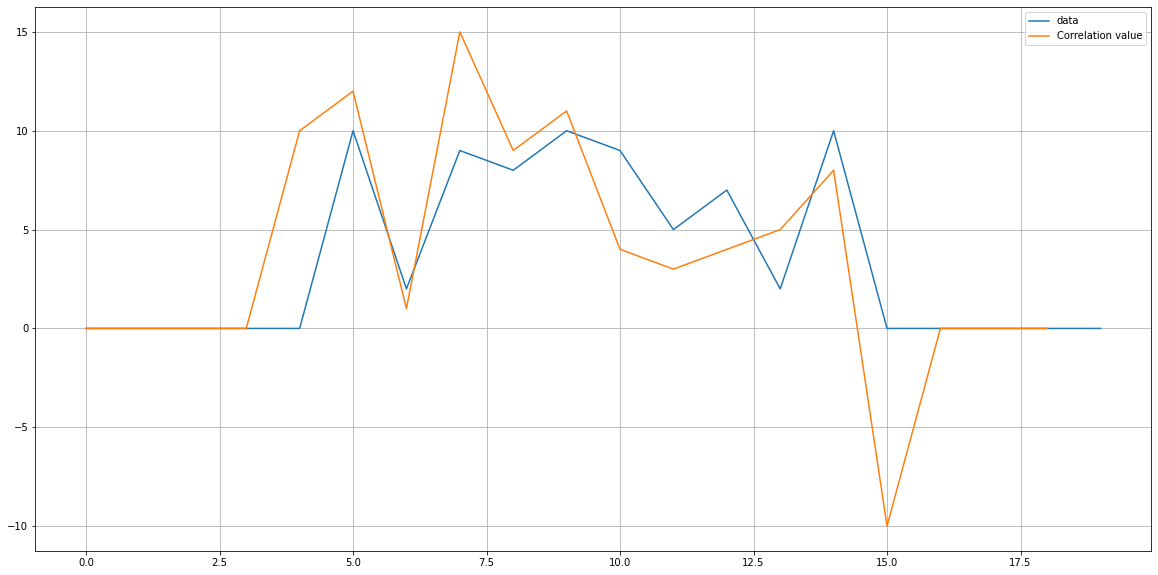

In [44]:
import random
import matplotlib.pyplot as plt

pad = 5
corr_filter = [-1,1,1]

data = [random.randint(0,10) for _ in range(10)]
data_len = len(data)
print(f"Input data: {data}")
print(f"Length of data: {len(data)}\n")

# Zero-padding
data = [0]*pad + data + [0]*pad
data_len = len(data)
print(f"Input data: {data}")
print(f"Length of data: {len(data)}\n")

# Correlation
corr_vec = list()
filter_size = len(corr_filter)
valid_len = data_len - filter_size + 1

for corr_loc in range(valid_len):
    window = data[corr_loc : corr_loc + filter_size]
    
    corr = 0
    for window_val , filter_val in zip(window, corr_filter):
        corr += window_val * filter_val
    corr_vec.append(corr)

print(f"Correlation: {corr_vec}")
print(f"Length of correlation: {len(corr_vec)}")

# Graph
fig, ax = plt.subplots(figsize=(20,10))
corr_vec = [0] + corr_vec

ax.plot(data, label="data")
ax.plot(corr_vec, label="Correlation value")

ax.legend(fontsize=10)
ax.grid()